# Personal Loan Acceptance Prediction

Objective: Predict which customers are likely to accept a personal loan offer.

## 1. Import Required Libraries
Import libraries for data analysis, visualization, and classification modeling.

In [4]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Load Dataset
Load the Bank Marketing dataset.

In [14]:
# Load dataset
df = pd.read_csv(r"E:\internship datasets\bank.csv", sep=";")

# Display first 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## 3. Dataset Overview
Explore dataset structure and basic information.

In [15]:
# Dataset shape
df.shape

# Column names
df.columns

# Check missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## 4. Exploratory Data Analysis (EDA)
Analyze age, job, and marital status distributions.

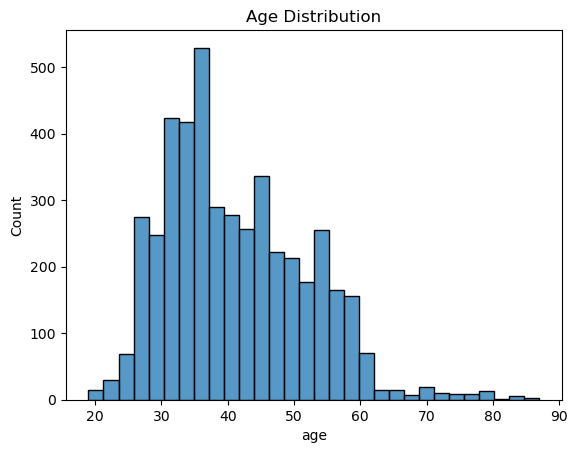

In [19]:
# Age distribution
plt.figure()
sns.histplot(df['age'], bins=30)
plt.title('Age Distribution')
plt.show()


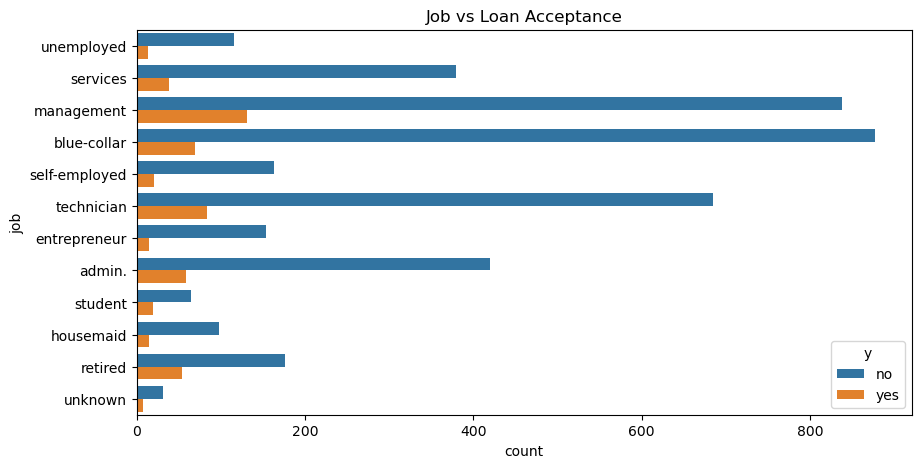

In [20]:
# Job vs Loan Acceptance
plt.figure(figsize=(10,5))
sns.countplot(y='job', hue='y', data=df)
plt.title('Job vs Loan Acceptance')
plt.show()

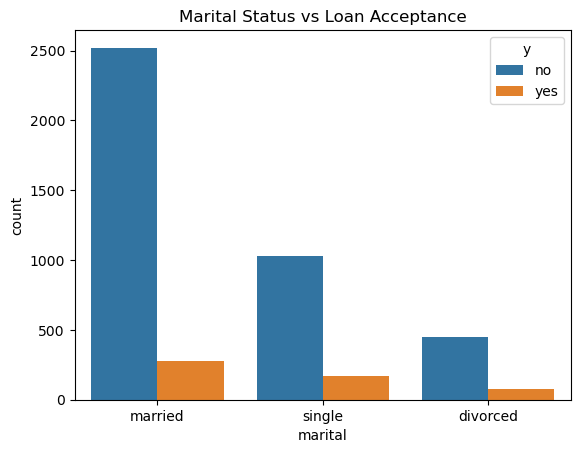

In [21]:
# Marital Status vs Loan Acceptance
plt.figure()
sns.countplot(x='marital', hue='y', data=df)
plt.title('Marital Status vs Loan Acceptance')
plt.show()

## 5. Data Preprocessing
Encode categorical variables into numerical form.

In [22]:
# Encode categorical variables
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Display processed data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


## 6. Feature Selection
Separate features and target variable.

In [23]:
# Independent variables
X = df.drop('y', axis=1)

# Target variable (y: yes/no for loan acceptance)
y = df['y']

## 7. Train-Test Split
Split data into training and testing sets.

In [24]:
# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 8. Train Logistic Regression Model
Train a Logistic Regression classifier.

In [25]:
# Initialize model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)

C:\Users\KK\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## 9. Model Evaluation
Evaluate the model using accuracy and classification report.

In [29]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.887292817679558
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.44      0.16      0.24        98

    accuracy                           0.89       905
   macro avg       0.68      0.57      0.59       905
weighted avg       0.86      0.89      0.86       905



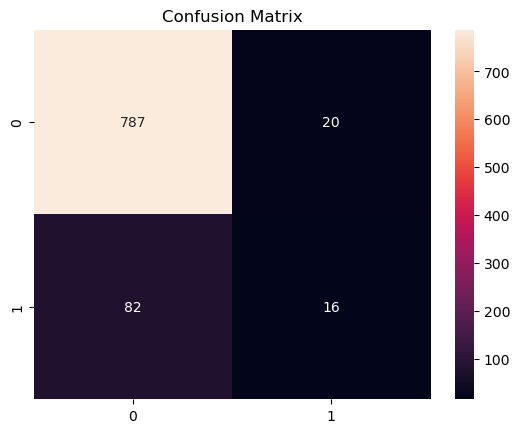

In [30]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

## 10. Business Insights
Identify customer groups more likely to accept the loan.

In [27]:
# Acceptance rate by age group
df['age_group'] = pd.cut(df['age'], bins=[18,30,45,60,100])
acceptance_by_age = df.groupby('age_group')['y'].mean()
acceptance_by_age

age_group
(18, 30]     0.142405
(30, 45]     0.098007
(45, 60]     0.108567
(60, 100]    0.377953
Name: y, dtype: float64